<a href="https://colab.research.google.com/github/subhashdixit/Data_Science_Materials_Topicwise/blob/main/EDA/EDA_Visa_Dataset/EDA_Visa_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visa Status Prediction
**Life cycle of Machine learning Project**

* Understanding the Problem Statement
* Data Collection
* Exploratory data analysis
* Data Cleaning
* Data Pre-Processing
* Model Training 
* Choose best model

## 1) Problem statement.

* This dataset comprises of all the import features which requires for VISA
* Predict the VISA status based on the different features available

## 2) Data Collection.
* The Dataset is collected by scrapping
* The data consists of 12 column and 25480 rows.

### 2.1 Import Data and Required Packages

**Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
from six.moves import urllib
import os

warnings.filterwarnings("ignore")

%matplotlib inline

**Download and Import the CSV Data as Pandas DataFrame**

In [2]:
download_url = "https://raw.githubusercontent.com/subhashdixit/Data_Science_Materials_Topicwise/main/EDA/EDA_Visa_Dataset/Visadataset.csv"
df = pd.read_csv(download_url)

**Show Top 5 Records**

In [3]:
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


**Shape of the dataset**

In [4]:
df.shape

(25480, 12)

In [5]:
# Display summary statistics for a dataframe
df.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


In [6]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


In [7]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['no_of_employees', 'yr_of_estab', 'prevailing_wage']

We have 9 categorical features : ['case_id', 'continent', 'education_of_employee', 'has_job_experience', 'requires_job_training', 'region_of_employment', 'unit_of_wage', 'full_time_position', 'case_status']


In [8]:
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


### Feature Information
##### Numerical Features
* **no_of_employees:** Number of employee
* **yr_of_estab:** Year of establishment 
* **prevailing_wage:** Wage amount

##### Categorical Features
* **case_id:** Id of the case
* **continent:** Name of the continent
* **education_of_employee:** Highest education of the employee
* **has_job_experience:** Whether the person has job experinece or not
* **requires_job_training:** Whether the person requires job training or not
* **region_of_employment:** Employment region
* **unit_of_wage:** Units in which person receive wages
* **full_time_position:** Whether the job is full time or not
* **case_status:** Status of the Visa

**proportion** of count data on categorical columns

In [9]:
for col in categorical_features:
    print(df[col].value_counts(normalize=True) * 100)
    print('---------------------------')

EZYV01       0.003925
EZYV16995    0.003925
EZYV16993    0.003925
EZYV16992    0.003925
EZYV16991    0.003925
               ...   
EZYV8492     0.003925
EZYV8491     0.003925
EZYV8490     0.003925
EZYV8489     0.003925
EZYV25480    0.003925
Name: case_id, Length: 25480, dtype: float64
---------------------------
Asia             66.173469
Europe           14.646782
North America    12.919937
South America     3.343799
Africa            2.162480
Oceania           0.753532
Name: continent, dtype: float64
---------------------------
Bachelor's     40.164835
Master's       37.810047
High School    13.422292
Doctorate       8.602826
Name: education_of_employee, dtype: float64
---------------------------
Y    58.092622
N    41.907378
Name: has_job_experience, dtype: float64
---------------------------
N    88.402669
Y    11.597331
Name: requires_job_training, dtype: float64
---------------------------
Northeast    28.237834
South        27.539246
West         25.847724
Midwest      16.90345

## Univariate Analysis

* The term univariate analysis refers to the analysis of one variable prefix “uni” means “one.” The purpose of univariate analysis is to understand the distribution of values for a single variable.

### Numerical Features

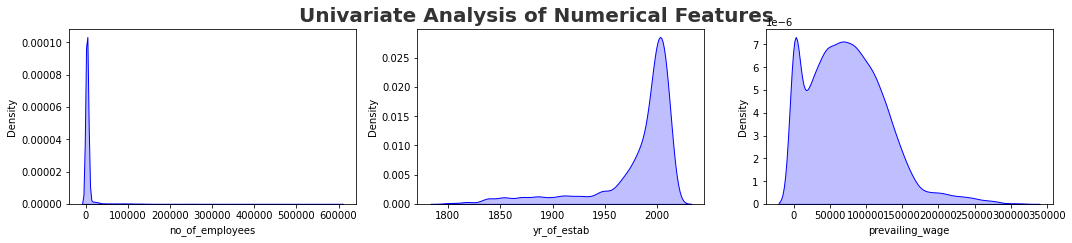

In [10]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[numeric_features[i]],shade=True, color='b')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

**Report**
* prevailing_wage are right skewed and postively skewed
* yr_of_estab is left skewed and postively skewed

### Categorical Features

In [11]:
categorical_features

['case_id',
 'continent',
 'education_of_employee',
 'has_job_experience',
 'requires_job_training',
 'region_of_employment',
 'unit_of_wage',
 'full_time_position',
 'case_status']

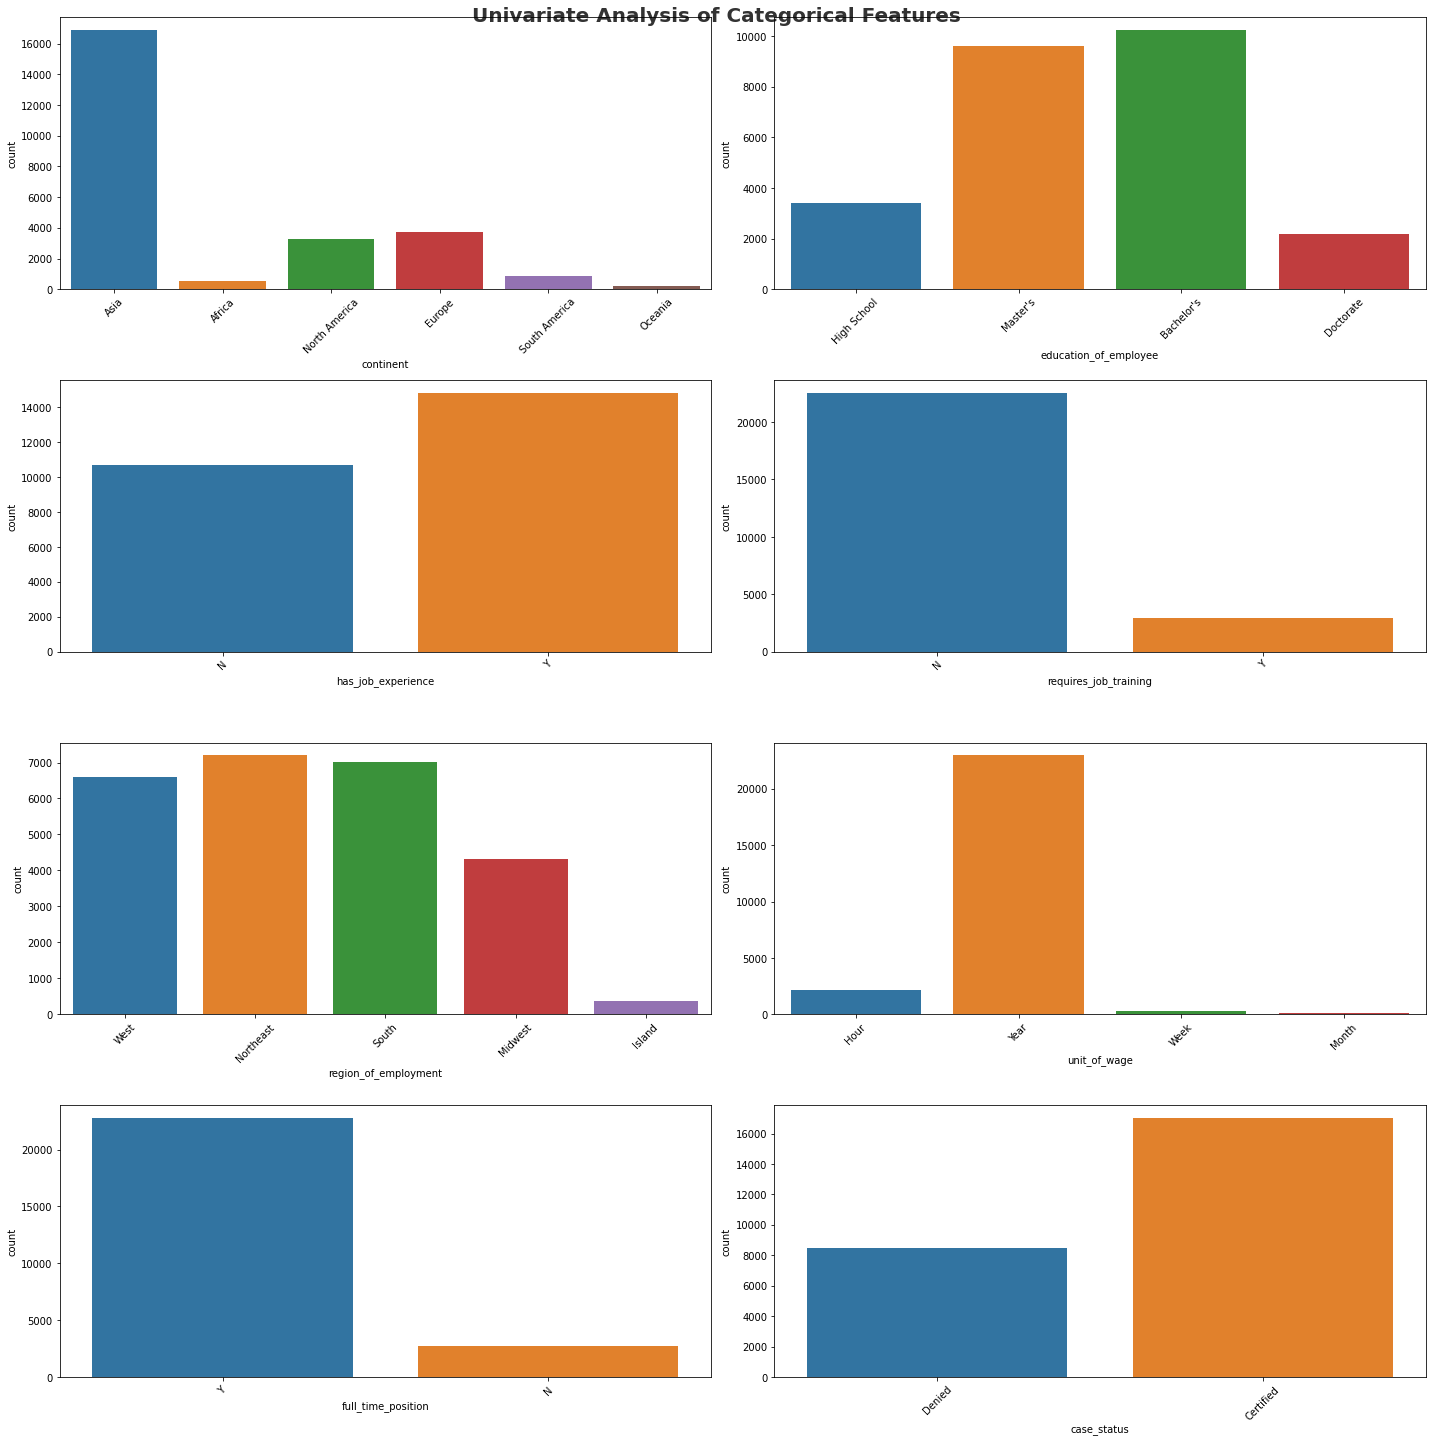

In [12]:
# categorical columns
plt.figure(figsize=(20, 20))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
# cat1 = ['case_id']
cat1 = ['continent',
 'education_of_employee',
 'has_job_experience',
 'requires_job_training',
 'region_of_employment',
 'unit_of_wage',
 'full_time_position',
 'case_status']
for i in range(0, len(cat1)):
    plt.subplot(4,2, i+1)
    sns.countplot(x=df[cat1[i]])
    plt.xlabel(cat1[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

## Multivariate Analysis

* Multivariate analysis is the analysis of more than one variable.

### Check Multicollinearity in Numerical features

In [13]:
df.corr()

,no_of_employees,yr_of_estab,prevailing_wage
no_of_employees,1.000000,-0.017770,-0.009523
yr_of_estab,-0.017770,1.000000,0.012342
prevailing_wage,-0.009523,0.012342,1.000000


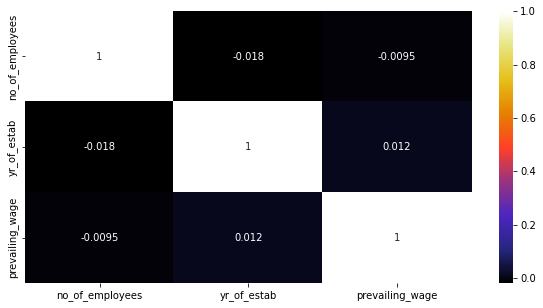

In [14]:
plt.figure(figsize = (10,5))
sns.heatmap(df.corr(), cmap="CMRmap", annot=True)
plt.show()

**Report** 

### Check Multicollinearity for Categorical features

* **A chi-squared test (also chi-square or χ2 test) is a statistical hypothesis test that is valid to perform when the test statistic is chi-squared distributed under the null hypothesis, specifically Pearson's chi-squared test**

* **A chi-square statistic is one way to show a relationship between two categorical variables.**

* **Here we test correlation of Categorical columns with Target column i.e case_status**

In [15]:
from scipy.stats import chi2_contingency
chi2_test = []
for feature in categorical_features:
    if chi2_contingency(pd.crosstab(df['case_status'], df[feature]))[1] < 0.05:
        chi2_test.append('Reject Null Hypothesis')
    else:
        chi2_test.append('Fail to Reject Null Hypothesis')
result = pd.DataFrame(data=[categorical_features, chi2_test]).T
result.columns = ['Column', 'Hypothesis Result']
result

,Column,Hypothesis Result
0,case_id,Fail to Reject Null Hypothesis
1,continent,Reject Null Hypothesis
2,education_of_employee,Reject Null Hypothesis
3,has_job_experience,Reject Null Hypothesis
4,requires_job_training,Fail to Reject Null Hypothesis
5,region_of_employment,Reject Null Hypothesis
6,unit_of_wage,Reject Null Hypothesis
7,full_time_position,Reject Null Hypothesis
8,case_status,Reject Null Hypothesis


### Checking Null Values

In [16]:
df.isnull().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

#### Continuous Features

In [17]:
continues_features=[feature for feature in numeric_features if len(df[feature].unique())>=10]
print('Num of continues features :',continues_features)

Num of continues features : ['no_of_employees', 'yr_of_estab', 'prevailing_wage']


In [18]:
print(f"no_of_employees:{len(df['no_of_employees'].unique())}")
print(f"yr_of_estab:{len(df['yr_of_estab'].unique())}")
print(f"prevailing_wage:{len(df['prevailing_wage'].unique())}")

no_of_employees:7105
yr_of_estab:199
prevailing_wage:25454


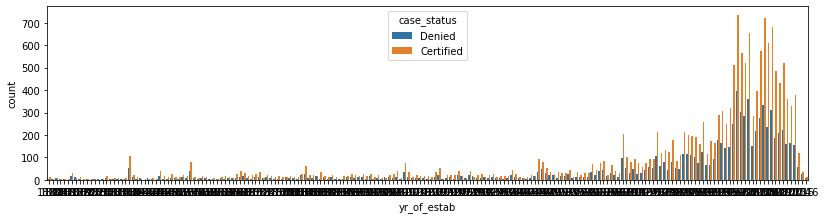

In [19]:
fig = plt.figure(figsize=(30, 30))

for i in range(1, len(continues_features)-1):
    ax = plt.subplot(8, 2, i+1)
    # sns.displot(data=df, x="case_status", y = continues_features[i])
    # sns.displot(data=df, x=continues_features[i], hue="case_status", multiple="stack")
    sns.countplot(data=df, x=continues_features[i], hue="case_status")

##### Outlier Check

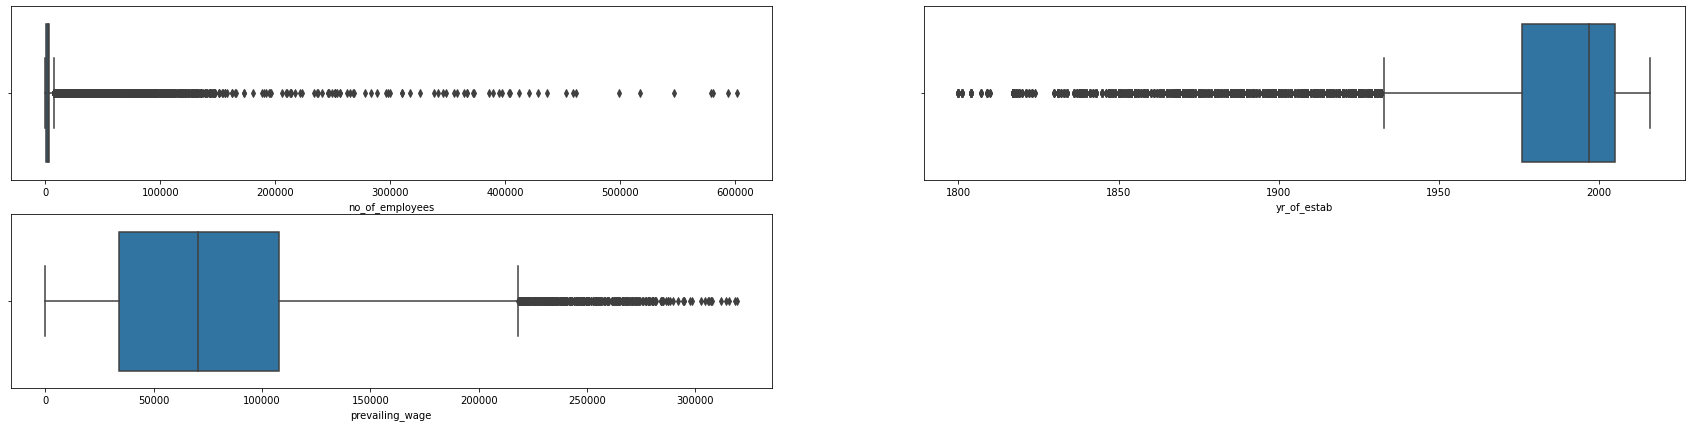

In [20]:
fig = plt.figure(figsize=(30, 30))

for i in range(0, len(continues_features)):
    ax = plt.subplot(8, 2, i+1)
    sns.boxplot(x=df[continues_features[i]])

* Outliers are present all three numerical features

#### Categorical Features

In [21]:
cat_features=[feature for feature in categorical_features if len(df[feature].unique())<=10]
print('Num of categorical features :',cat_features)

Num of categorical features : ['continent', 'education_of_employee', 'has_job_experience', 'requires_job_training', 'region_of_employment', 'unit_of_wage', 'full_time_position', 'case_status']


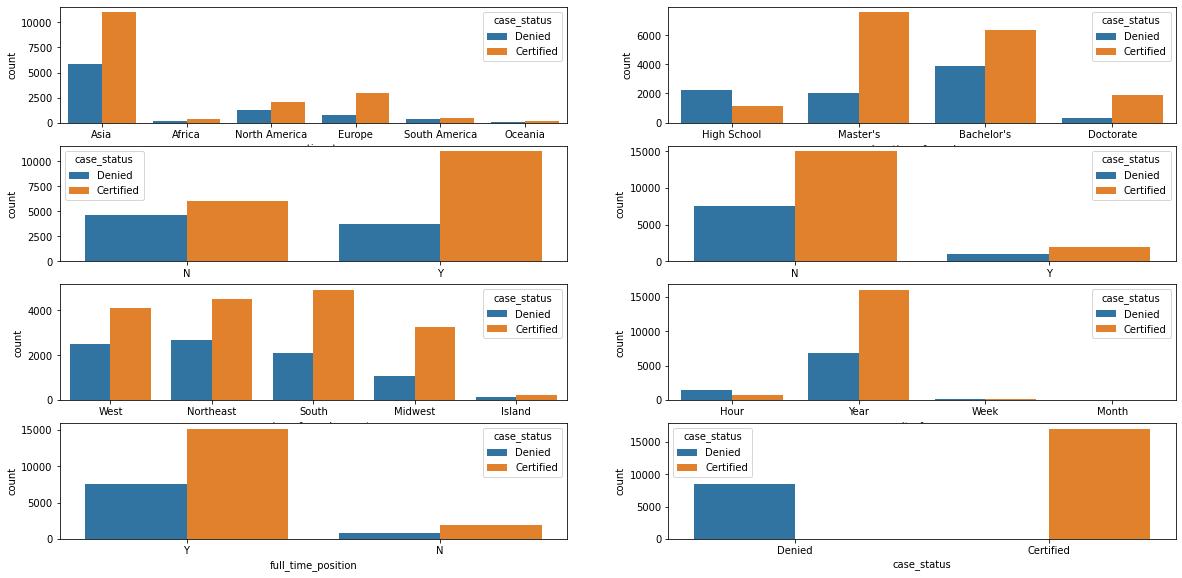

In [22]:
fig = plt.figure(figsize=(20, 20))

for i in range(0, len(cat_features)):
    ax = plt.subplot(8, 2, i+1)
    sns.countplot(data=df, x=cat_features[i], hue="case_status")

## Initial Analysis Report

**Report**
* **Those who are not having full time position, their visa status are denied**
* **Those who are not having job experience, their visa status are denied**
* **More people applied from Asia for Visa**

## 4. Visualization

### 4.1 Visualize the Target Feature

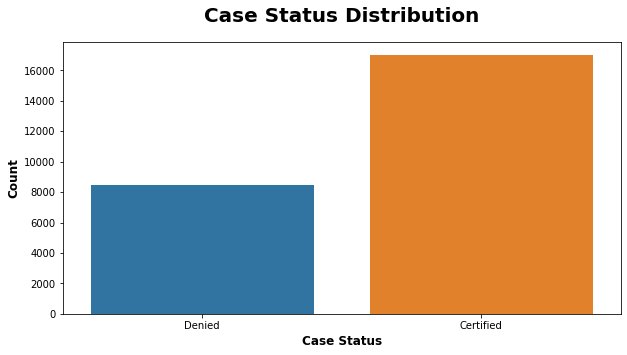

In [23]:
plt.subplots(figsize=(10,5))
sns.countplot(data=df, x="case_status")
plt.title("Case Status Distribution", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Case Status", weight="bold", fontsize=12)
plt.show()

* From the chart it is clear that in half of the visa status is denied

In [24]:
df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


## Final Report

* The datatypes and Column names were right and there was 25480 rows and 12 columns
* The `case_status` column is the target to predict. i.e Classification Problem
* There are outliers in all three numerical features
* Skewness is found in few of the columns will check it after handling outliers
* We just need less data cleaning for this dataset